# Quantum Maze Solver

In [1]:
import maze_generator

maze = maze_generator.generate_maze(2,2,2)


AttributeError: module 'maze_generator' has no attribute 'generate_maze'

In [ ]:
import os
import sys
sys.path.insert(0, os.path.abspath('utils'))
import qiskit
from qiskit.result import marginal_counts
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector # to compute state vectors
from qiskit.visualization import array_to_latex
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator # ideal simulator backend
from qiskit.visualization import plot_histogram  # to plot histograms of simulation results
import numpy as np
from collections import namedtuple
from IPython.display import display, Markdown, Latex
import sympy as sp
from qiskit.circuit.library.standard_gates import XGate

sys.path.insert(1, '../')
from utils import Helpers as hp

In [ ]:
def map_graph(edges, registry_size: int = 2, directed: bool = False):
    circ = QuantumCircuit((2 * registry_size) + 1)
    def map_edge(from_node: int, to_node: int):
        target_qubit = (2 * registry_size)
        def add_x(number, start_qubit):
            exp = 1
            for qubit in range(start_qubit, start_qubit + registry_size):
                if not (number & exp):
                    circ.x(qubit)
                exp *= 2

        add_x(from_node, 0)
        add_x(to_node, registry_size)
        print(target_qubit)
        print(list(range((2 * registry_size))))
        circ.append(XGate().control(target_qubit), list(range((2 * registry_size))) + [target_qubit])
        add_x(from_node, 0)
        add_x(to_node, registry_size)
        
    for e in edges:
        map_edge(e[0], e[1])
        circ.barrier()
        if not directed:
            map_edge(e[1], e[0])
            circ.barrier()
    return circ



In [ ]:
# Creates a circuit that negates the input ( |x> => -I|x> )
def negate(num_qubits: int):
    n = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        n.z(i)
        n.x(i)
        n.z(i)
        n.x(i)
    return n

<IPython.core.display.Latex object>

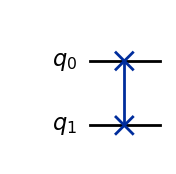

In [ ]:
#print("ciao")
qc = QuantumCircuit(2)
qc.swap(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))



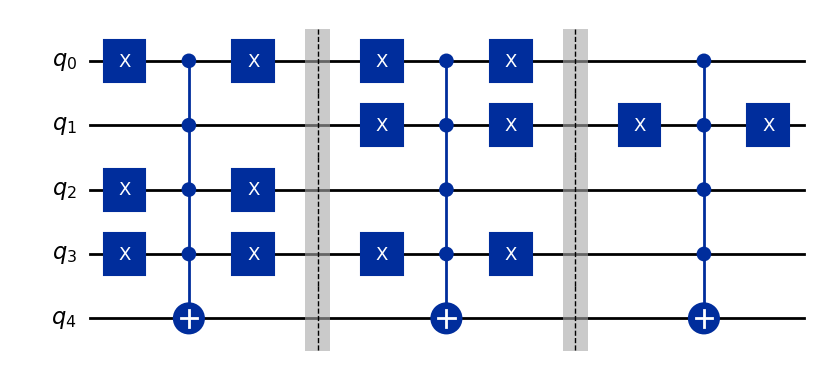

In [ ]:
check_path = QuantumCircuit(5)
# (1,0)
check_path.x(0)
check_path.x(2)
check_path.x(3)
check_path.append(XGate().control(4), [0, 1, 2, 3, 4])
check_path.x(0)
check_path.x(2)
check_path.x(3)
check_path.barrier()
# (0,2)
check_path.x(0)
check_path.x(1)
check_path.x(3)
check_path.append(XGate().control(4), [0, 1, 2, 3, 4])
check_path.x(0)
check_path.x(1)
check_path.x(3)
check_path.barrier()
# (2,3)
check_path.x(1)
check_path.append(XGate().control(4), [0, 1, 2, 3, 4])
check_path.x(1)

check_path.draw(output='mpl')

4
[0, 1, 2, 3]
4
[0, 1, 2, 3]
4
[0, 1, 2, 3]


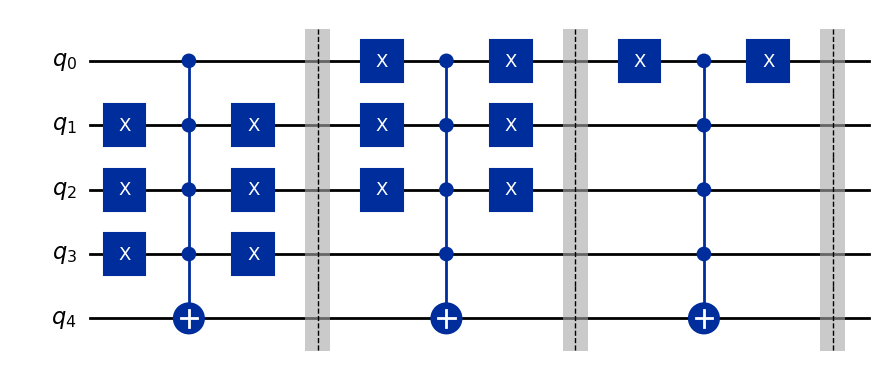

In [ ]:
map_graph([(1, 0), (0, 2), (2, 3)], directed=True).draw('mpl')

In [ ]:
from qiskit.quantum_info import Statevector # to compute state vectors
from qiskit.visualization import array_to_latex

sv = Statevector.from_label('10')
qc = QuantumCircuit(1)
qc.z(0)
qc.x(0)
qc.z(0)
qc.x(0)
# qc.append(negate, [0,1,2,3,4,5,6,7])
array_to_latex(sv.evolve(qc), prefix="\\text{Final state = }")

<IPython.core.display.Latex object>

In [ ]:
from mazelib import Maze
from mazelib.generate.Prims import Prims

m = Maze()
m.generator = Prims(3, 3)
m.generate()
print(m)
import matplotlib.pyplot as plt

def showPNG(grid):
    """Generate a simple image of the maze."""
    plt.figure(figsize=(10, 5))
    plt.imshow(grid, cmap=plt.cm.binary, interpolation='nearest')
    plt.xticks([]), plt.yticks([])
    plt.show()
showPNG(m.grid)

DEBUG:root:Class DepthFirstBacktracker ctor called
DEBUG:root:Class Solver ctor called
DEBUG:root:Class DepthFirstBacktracker solve called
DEBUG:root:Class DepthFirstBacktracker leaving solve



Generating the maze with depth-first search...
Number of moves performed: 182
Execution time for algorithm: 0.0015

Generating the maze with depth-first search...
Number of moves performed: 176
Execution time for algorithm: 0.0000

Solving the maze with depth-first search...
Number of moves performed: 17
Execution time for algorithm: 0.0000


DEBUG:matplotlib.font_manager:findfont: Matching serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\admin\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\admin\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\admin\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(Fo

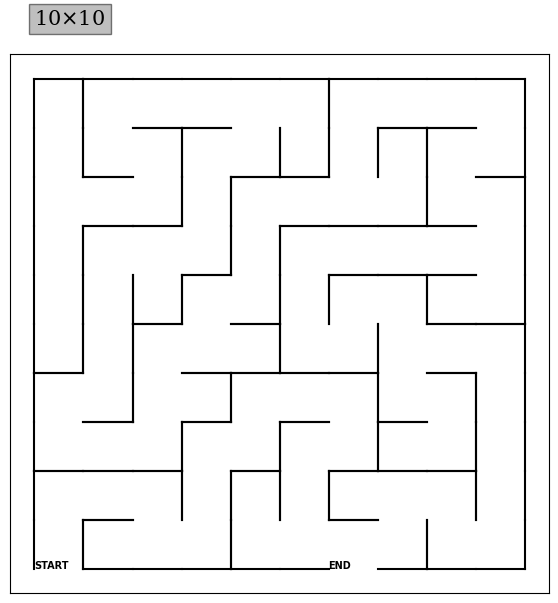

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'frameon'

In [ ]:

from __future__ import absolute_import
from src.maze_manager import MazeManager
from src.maze import Maze


if __name__ == "__main__":

    # The easiest way to use the library is through the Manager class. It acts as the glue between
    # The visualization, solver, and maze classes. Mazes inside the manager have unique ids that we use
    # to specify particular mazes.
    manager = MazeManager()

    # We can add mazes to the manager two different ways.
    # The first way, we specify the maze dimensions. The maze that is created gets returned back to you.
    maze = manager.add_maze(10, 10)

    # The second way is by creating a maze, and then adding it to the manager. Doing this will require you to add
    # from src.maze import Maze
    # to your imports. Because the ids need to be unique, the manager will ensure this happens. It may change the
    # id of the maze that was passed in, so we assign it to the return value to make sure we're using the updated maze.
    maze2 = Maze(10, 10)
    maze2 = manager.add_existing_maze(maze2)

    # Once we have a maze in the manager, we can tell the manager to solve it with a particular algorithm.
    #manager.solve_maze(maze.id, "BreadthFirst")
    #manager.solve_maze(maze.id, "BiDirectional")
    manager.solve_maze(maze.id, "DepthFirstBacktracker")

    # If we want to save the maze & maze solution images along with their animations, we need to let the manager know.
    manager.set_filename("myFileName")

    # To see the unsolved maze, call
    manager.show_maze(maze.id)

    # You can also set the size of the cell by passing show_maze's second argument. The default is 1.
    # manager.show_maze(maze.id, 2)

    # To show an animation of how the maze was generated, use the following line
    manager.show_generation_animation(maze.id)

    # You can also see an animation of how the solver went about finding the end
    manager.show_solution_animation(maze.id)

    # Finally, you can show an image of the maze with the solution path overlaid. All of these display
    # functions will save the figure if MazeManager::set_filename has been set.
    manager.show_solution(maze.id)